In [55]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.tsa.api as smt
import statsmodels.api as sm 
import statsmodels.formula.api as smf 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
pd.set_option('display.float_format',lambda x:'%.5f' % x) # pandas 
np.set_printoptions(precision=5,suppress=True) # numpy 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

# seaborn plotting style 
sns.set(style='ticks',context='poster')

In [47]:
filename_ts='data/series1.csv'
ts_df=pd.read_csv(filename_ts,index_col=0,parse_dates=[0])

In [48]:
n_sample=ts_df.shape[0]

In [49]:
print(ts_df.shape)
print(ts_df.head())

(120, 1)
              value
2006-06-01  0.21507
2006-07-01  1.14225
2006-08-01  0.08077
2006-09-01 -0.73952
2006-10-01  0.53552


In [50]:
# Create a training sample ans testing sample before analyzing the series 
n_train=int(0.95*n_sample)+1
n_forecast=n_sample-n_train

In [51]:
#ts_df 
ts_train=ts_df.iloc[:n_train]['value']
ts_test=ts_df.iloc[n_train:]['value']

In [52]:
print("Training Series:","\n",ts_train.tail(),"\n")
print("Testing Series:","\n",ts_test.head())

Training Series: 
 2015-08-01    0.60371
2015-09-01   -1.27372
2015-10-01   -0.93284
2015-11-01    0.08552
2015-12-01    1.20534
Name: value, dtype: float64 

Testing Series: 
 2016-01-01    2.16411
2016-02-01    0.95226
2016-03-01    0.36485
2016-04-01   -2.26487
2016-05-01   -2.38168
Name: value, dtype: float64


In [53]:
def tsplot(y,lags=None,title='',figsize=(14,8)):
    fig=plt.figure(figsize=figsize)
    layout=(2,2)
    ts_ax=plt.subplot2grid(layout, (0,0))
    hist_ax=plt.subplot2grid(layout,(0,1))
    acf_ax=plt.subplot2grid(layout,(1,0))
    pacf_ax=plt.subplot2grid(layout,(1,1))
    
    y.plot(ax=ts_ax)
    ts_ax.set_title(title)
    y.plot(ax=hist_ax,kind='hist',bins=25)
    hist_ax.set_title('Histogram')
    smt.graphics.plot_acf(y,lags=lags,ax=acf_ax)
    smt.graphics.plot_pacf(y,lags=lags,ax=pacf_ax)
    [ax.set_xlim(0) for ax in [acf_ax,pacf_ax]]
    sns.despine()
    fig.tight_layout()
    return ts_ax,acf_ax,pacf_ax

(<matplotlib.axes._subplots.AxesSubplot at 0x7fef3c9902b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fef3cdcc160>)

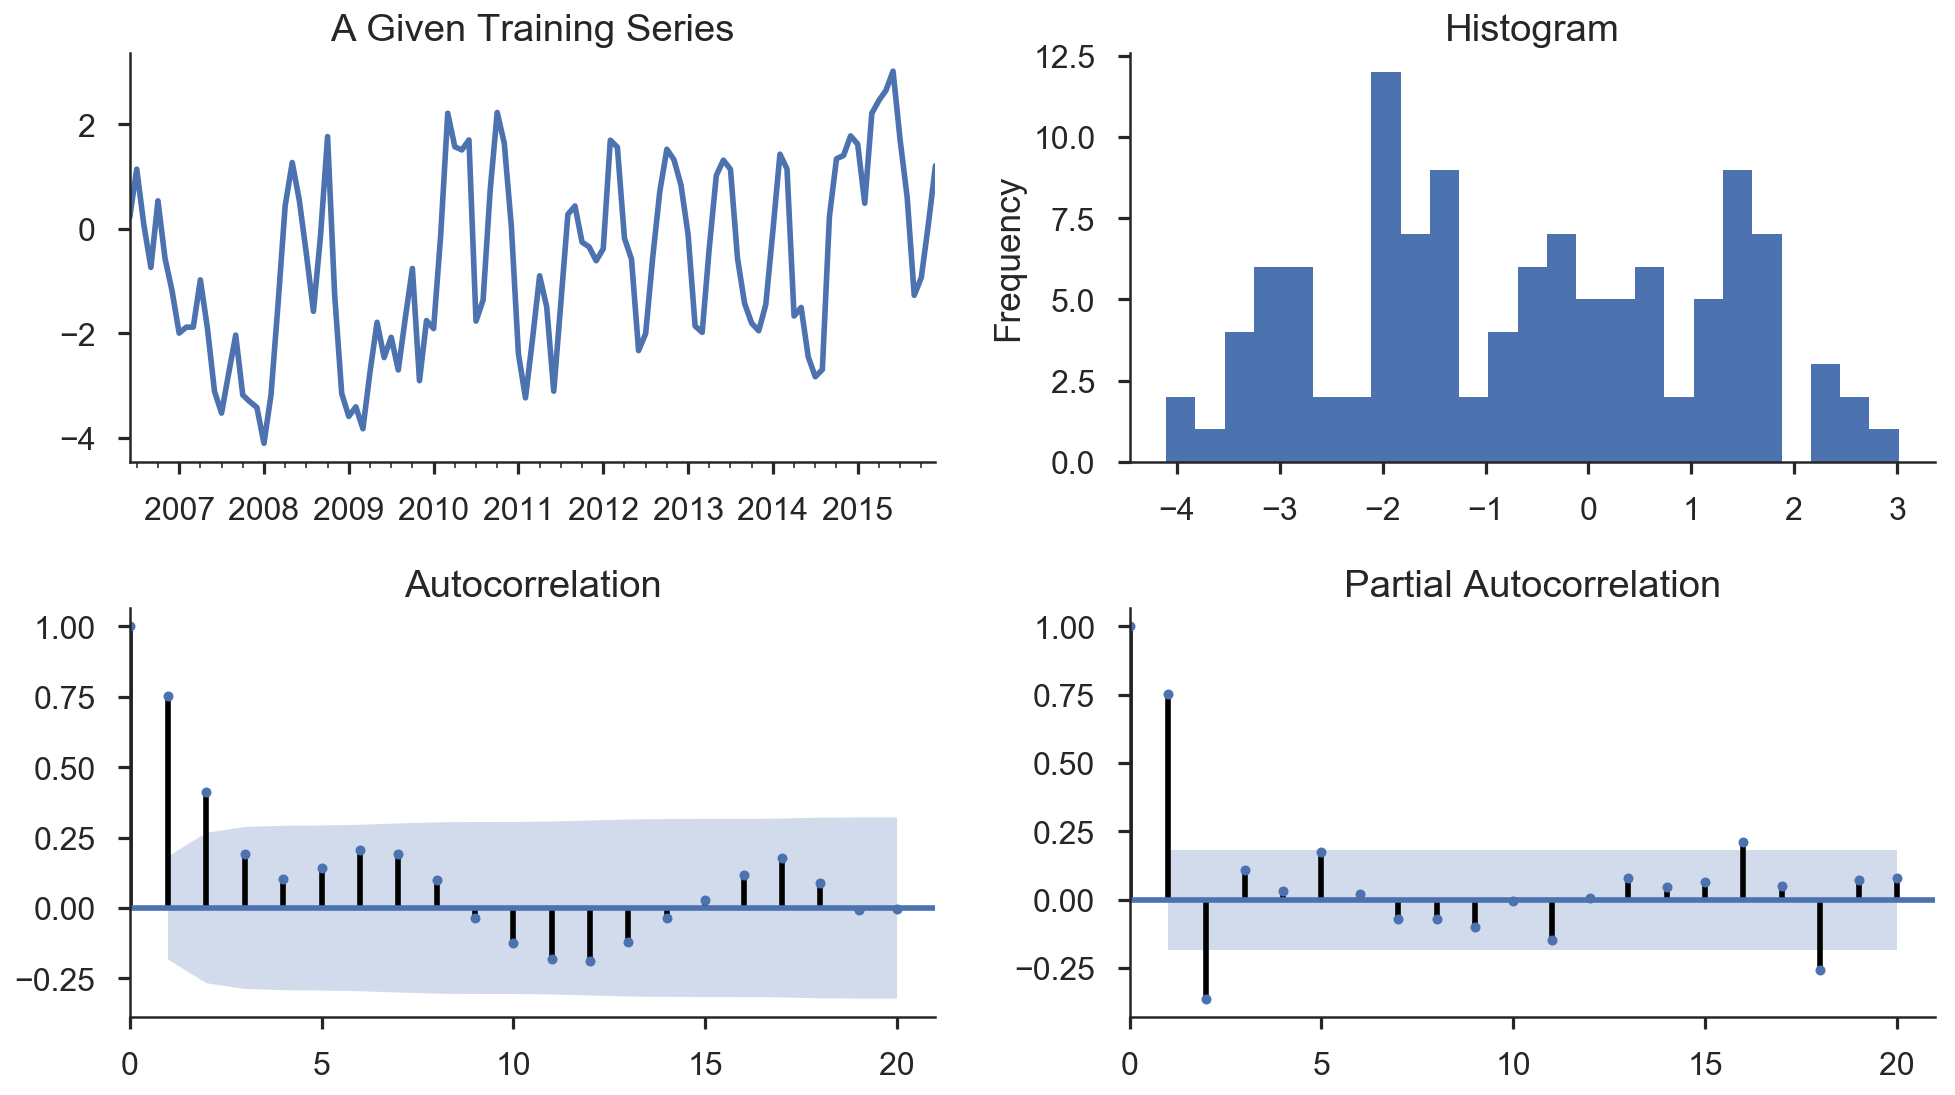

In [54]:
tsplot(ts_train,lags=20,title='A Given Training Series')

In [56]:
# Model Estimation 
# Fit the model 
arima200=sm.tsa.SARIMAX(ts_train,order=(2,0,0))
model_results=arima200.fit()

In [ ]:
import itertools
p_min=0
d_min=0
q_min=0
p_max=4
d_max=0
q_max=4
# Initialize a DataFrame to store the results
results_bic=pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],columns=['MA{}'.format(i) for i in range(q_min,q_max+1)]
                